In [1]:
# A single-layer PERCEPTION
# Single -Layer networks with threshold activation functions, were studied by Rossen-blatt (1962) who called them perceptrons
# Reference: Bishop: neural networks for pattern recognition Page 82,231 Oreilly-Learning-TensorFlow page 98
# Book: https://raw.githubusercontent.com/oreilly-japan/deep-learning-from-scratch/images/deep-learning-from-scratch.png
# O'Reilly Japan - GitHub
# https://github.com/oreilly-japan/deep-learning-from-scratch
#Exercise 5.
# Run code1
# 2.3.1 AND Gate
# https://github.com/oreilly-japan/deep-learning-from-scratch/blob/master/ch02/and_gate.py

In [2]:
#Binary Classification/Logistic Regression
# Reference: Bishop: bishop neural networks for pattern recognition 82,231 Oreilly-Learning-TensorFlow page 82-85
# 3.1.3 Logistic discrimination 
# 3.1.4 Binary in put vectors
# Assumptions: statistically individual independent distribution iid 
# =>The probability for complete input vector as the product of the probabilities for each of the components separately

In [3]:
# MatPlotlib
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
   
# Scientific libraries
import numpy as np
import scipy.linalg

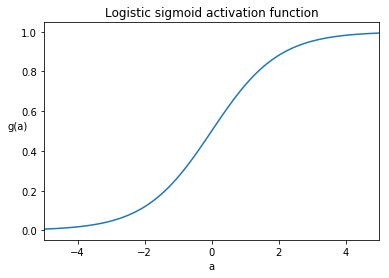

In [4]:
#The use of the logistic sigmoid activation function allows the outputs
#of the discriminant to be interpreted as posterior probabilities P(Xi|X), i=0,1
#Logistic sigmoid activation function
# Reference: Bishop: Pattern Recognition and Machine Learning Page 82,231 Oreilly-Learning-TensorFlow
# Plot of the logistic sigmoid activation function given by g(a)=1/(1+exp(-a))
x = np.linspace(-6.0, 6.0, 100)
y=1/(1+np.exp(-x))
plt.plot(x, y)
plt.xlabel('a')
plt.ylabel('g(a)',rotation=0)
plt.xlim(-5, 5)
plt.title('Logistic sigmoid activation function')
plt.show()



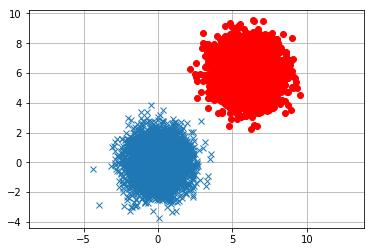

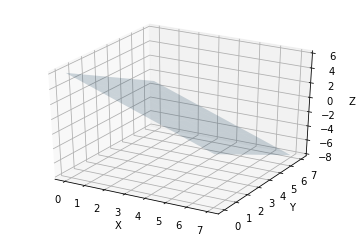

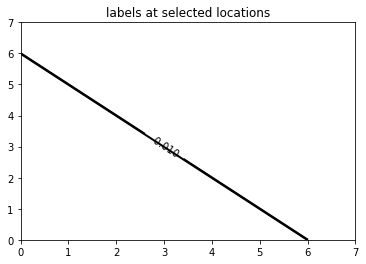

0

In [117]:
#  2D dispersion around the centroid,
#numpy.random.multivariate_normal
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.multivariate_normal.html
#The use of the logistic sigmoid activation function allows the outputs g(WX+W0)
#of the discriminant to be interpreted as posterior probabilities P(Xi|X), i=0,1    

# Baye's Theorem
#P(C0|X)=P(X|C0)P(C0)/(P(X|C0)P(C0)+P(X|C1)P(C1))
#P(C1|X)=P(X|C1)P(C1)/(P(X|C0)P(C0)+P(X|C1)P(C1))

# 2D Gaussian distribution sampling points with dispersion diagram
#numpy.random.multivariate_normal
#https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.multivariate_normal.html
plt.figure(1)    

mean0 = [0, 0]
cov0 = [[1, 0], [0, 1]]  # diagonal covariance
x01, x02 = np.random.multivariate_normal(mean0, cov0, 5000).T
plt.plot(x01, x02, 'x')
plt.axis('equal')

mean1 = [6, 6]
cov1 = [[1, 0], [0, 1]]  # diagonal covariance
x11, x12 = np.random.multivariate_normal(mean1, cov1, 5000).T
plt.plot(x11, x12, 'ro')
plt.axis('equal')
plt.grid(True)


#Use our eyes to draw a line by two points.

#x = np.array([0.0, 6.0])
#y = np.array([6.0, 0.0])
#plt.plot(x,y) #pylab.plot(x, y)
#plt.show()

def hyperplane():
    # regular grid covering the domain of the data
    X,Y = np.meshgrid(np.arange(0.0, 8.0, 1), np.arange(0.0, 8.0, 1))
    XX = X.flatten()
    YY = Y.flatten()
    # evaluate it on grid
    W=np.array([6, -1, -1])
    Z = W[1]*X + W[2]*Y + W[0]
    # plot points and fitted surface
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2)
    plt.xlabel('X')
    plt.ylabel('Y')  
    ax.set_zlabel('Z')
    ax.axis('equal')
    ax.axis('tight')
    plt.show()
    return X,Y,Z

def decisionboundary(x,y,z):
    #meshgrid is very useful to evaluate functions on a grid. 
    #https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.meshgrid.html
    
    #x1 = np.arange(-5, 5, 0.1)
    #x2 = np.arange(-5, 5, 0.1)
    #xx1, xx2 = np.meshgrid(x1, x2, sparse=True)
    #z=-1*xx1-xx2+6.0
    
    h = plt.contour(x,y,z,levels = [-0.01,0.01],colors=('k',),linestyles=('-',),linewidths=(2,))
    manual_locations = [(3.0, 3.0)]
    #contour labels can be placed manually by providing list of positions
    #https://matplotlib.org/examples/pylab_examples/contour_demo.html
    plt.clabel(h, inline=1, fontsize=10, manual=manual_locations)
    plt.title('labels at selected locations')
    plt.show()
    return 0

def Surfaces3D():
# Fitting plane/surface to a set of data points
#https://gist.github.com/amroamroamro/1db8d69b4b65e8bc66a6

# some 3-dim points
    mean = np.array([0.0,0.0,0.0])
    cov = np.array([[1.0,-0.5,0.8], [-0.5,1.1,0.0], [0.8,0.0,1.0]])
    data = np.random.multivariate_normal(mean, cov, 50)

# regular grid covering the domain of the data
    X,Y = np.meshgrid(np.arange(-3.0, 3.0, 0.5), np.arange(-3.0, 3.0, 0.5))
    XX = X.flatten()
    YY = Y.flatten()
    
    order = 1    # 1: linear, 2: quadratic
    if order == 1:
      # best-fit linear plane
      A = np.c_[data[:,0], data[:,1], np.ones(data.shape[0])]
      C,_,_,_ = scipy.linalg.lstsq(A, data[:,2])    # coefficients
    
      # evaluate it on grid
      Z = C[0]*X + C[1]*Y + C[2]
    
      # or expressed using matrix/vector product
      #Z = np.dot(np.c_[XX, YY, np.ones(XX.shape)], C).reshape(X.shape)

    elif order == 2:
      # best-fit quadratic curve
      A = np.c_[np.ones(data.shape[0]), data[:,:2], np.prod(data[:,:2], axis=1), data[:,:2]**2]
      C,_,_,_ = scipy.linalg.lstsq(A, data[:,2])
      # evaluate it on a grid
      Z = np.dot(np.c_[np.ones(XX.shape), XX, YY, XX*YY, XX**2, YY**2], C).reshape(X.shape)
    
    # plot points and fitted surface
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2)
    ax.scatter(data[:,0], data[:,1], data[:,2], c='r', s=50)
    plt.xlabel('X')
    plt.ylabel('Y')  
    ax.set_zlabel('Z')
    ax.axis('equal')
    ax.axis('tight')
    plt.show()
    return 0




#Use our eyes to draw a line by two points.
X,Y,Z=hyperplane()
decisionboundary(X,Y,Z)

#Surfaces3D()



# pylab_examples example code: contour_demo.py
# https://matplotlib.org/examples/pylab_examples/contour_demo.html




In [118]:
#Exercise 1.
#Try to find a line to separate these two group points to two class
#and define the line equation and draw it on the same graphs.

In [22]:
#Exercise 2.
#According to the line equation and please define a discriminant function f(X),
#and calculate the value of f(X) for every X.A capital letter represents vector and a lowercase letter represents a variable.

In [23]:
# 2D dispersion around the centroid,
#Exercise 3.
#To characterize the amount of sigma of 2D dispersion around the centroid (mean) 

# search Google: keywords: calculate 2d data mean variance/ python  2d data mean variance
# reference
#https://en.wikipedia.org/wiki/Algorithms_for_calculating_variance
# https://stats.stackexchange.com/questions/65640/how-to-calculate-2d-standard-deviation-with-0-mean-bounded-by-limits
#https://math.stackexchange.com/questions/819747/measuring-variance-of-2d-data-points
# https://www.mathworks.com/help/matlab/ref/var.html

In [24]:
# Baye's Theorem
# a lowercase letter p represents distribution, and capital letter P represents probability 
#p(C0|X)=p(X|C0)P(C0)/(P(X|C0)P(C0)+p(X|C1)P(C1))
#p(C1|X)=p(X|C1)P(C1)/(P(X|C0)P(C0)+p(X|C1)P(C1))
#Exercise 4.
# Calculate posterior probabilities P(Xi|X), i=0,1

In [25]:
# The PERCEPTION
# Single -Layer networks with threshold activation functions, were studied by Rossen-blatt (1962) who called them perceptrons
# Reference: Bishop: Pattern Recognition and Machine Learning Page 82,231 Oreilly-Learning-TensorFlow page 98
# Book: https://raw.githubusercontent.com/oreilly-japan/deep-learning-from-scratch/images/deep-learning-from-scratch.png
# O'Reilly Japan - GitHub
# https://github.com/oreilly-japan/deep-learning-from-scratch
#Exercise 5.
# Run code1
# 2.3.1 AND Gate
# https://github.com/oreilly-japan/deep-learning-from-scratch/blob/master/ch02/and_gate.py

In [26]:
# Oreilly-Learning-TensorFlow
# https://github.com/Hezi-Resheff/Oreilly-Learning-TensorFlow
#Exercise 6.

# Softmax Regression
# Run code1
# https://github.com/Hezi-Resheff/Oreilly-Learning-TensorFlow/blob/master/02__up_and_running/softmax.py
# Run code2
# Google tutorial: MNIST For ML Beginners
# https://www.tensorflow.org/versions/r1.1/get_started/mnist/beginners